In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# importing dataset
df=pd.read_csv("ai_assistant_usage_student_life.csv")
# first five rows of dataset
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
df.shape

(10000, 11)

In [4]:
df.dtypes #column names and their data types.

SessionID              object
StudentLevel           object
Discipline             object
SessionDate            object
SessionLengthMin      float64
TotalPrompts            int64
TaskType               object
AI_AssistanceLevel      int64
FinalOutcome           object
UsedAgain                bool
SatisfactionRating    float64
dtype: object

In [5]:
# missing values
df.isnull().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [6]:
# summary statistics for SessionLengthMin and TotalPrompts
df.describe()[['SessionLengthMin', 'TotalPrompts']]

,SessionLengthMin,TotalPrompts
count,10000.000000,10000.000000
mean,19.846467,5.607500
std,13.897302,4.648764
min,0.030000,1.000000
25%,9.630000,2.000000
50%,16.650000,4.000000
75%,26.670000,8.000000
max,110.810000,39.000000


In [7]:
# number of unique values in StudentLevel, Discipline, and TaskType
unique_values=df.nunique()[['StudentLevel', 'Discipline', 'TaskType']]
print(unique_values)

StudentLevel    3
Discipline      7
TaskType        6
dtype: int64


In [8]:
 # most common TaskType
common_tasktype=df['TaskType'].value_counts().idxmax()
print("Most common TaskType:", common_tasktype)

Most common TaskType: Writing


In [9]:
# average SessionLengthMin for each StudentLevel
avg_session_length=df.groupby('StudentLevel')['SessionLengthMin'].mean()
print(avg_session_length)

StudentLevel
Graduate         20.252236
High School      20.023740
Undergraduate    19.650943
Name: SessionLengthMin, dtype: float64


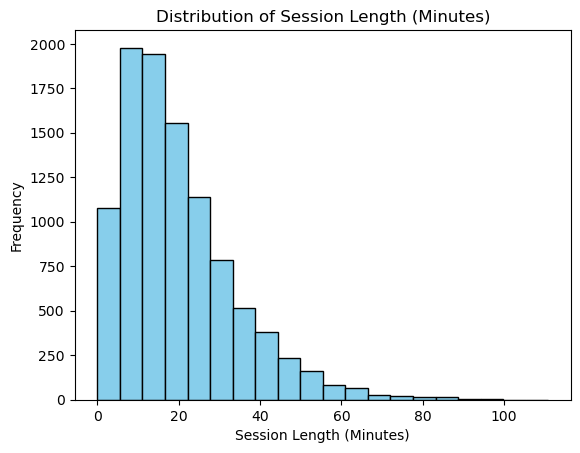

In [10]:
# histogram of SessionLengthMin
plt.hist(df['SessionLengthMin'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Session Length (Minutes)')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Frequency')
plt.show()

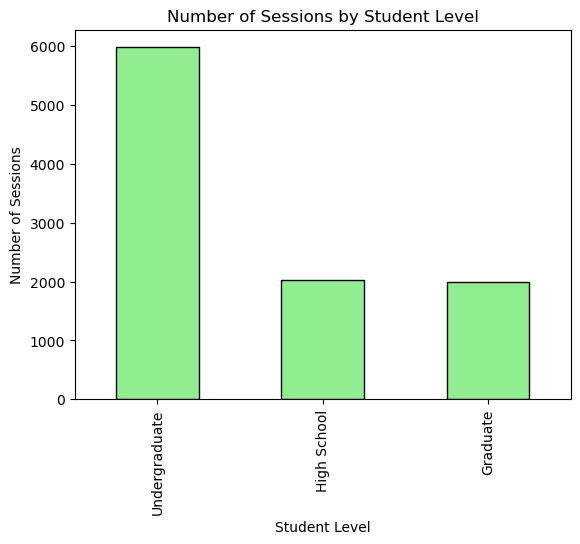

In [11]:
# bar chart of session counts by StudentLevel
session_counts=df['StudentLevel'].value_counts()
session_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Sessions by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Number of Sessions')
plt.show()

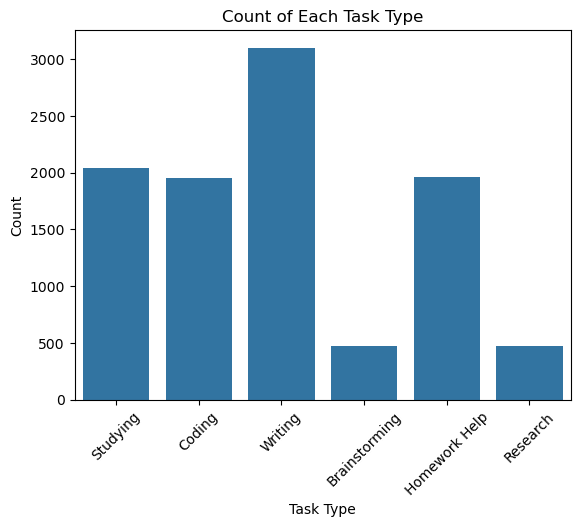

In [12]:
# countplot of TaskType using Seaborn.
import seaborn as sns
sns.countplot(data=df, x='TaskType')
plt.title('Count of Each Task Type')
plt.xlabel('Task Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

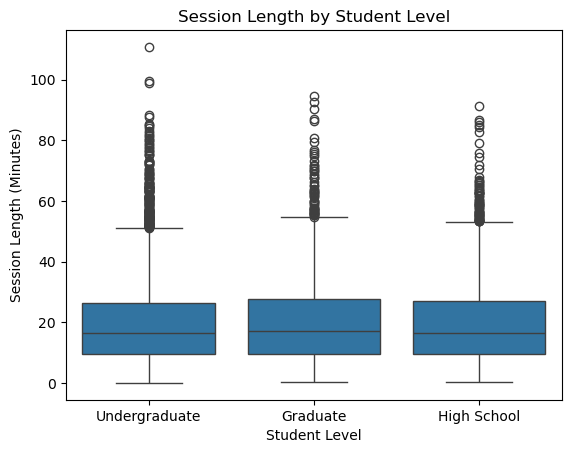

In [13]:
# boxplot of SessionLengthMin grouped by StudentLevel.
sns.boxplot(data=df, x='StudentLevel', y='SessionLengthMin')
plt.title('Session Length by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Session Length (Minutes)')
plt.show()

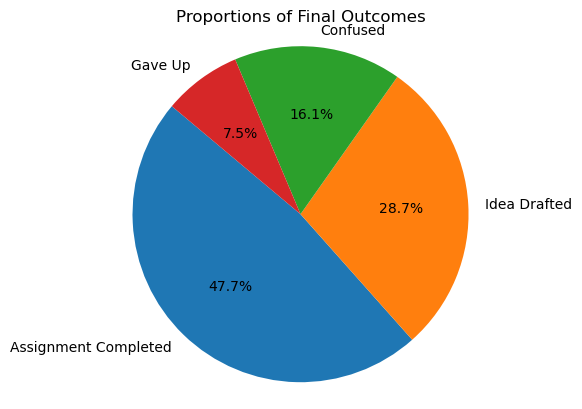

In [14]:
# proportions of FinalOutcome
outcome_counts=df['FinalOutcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportions of Final Outcomes')
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

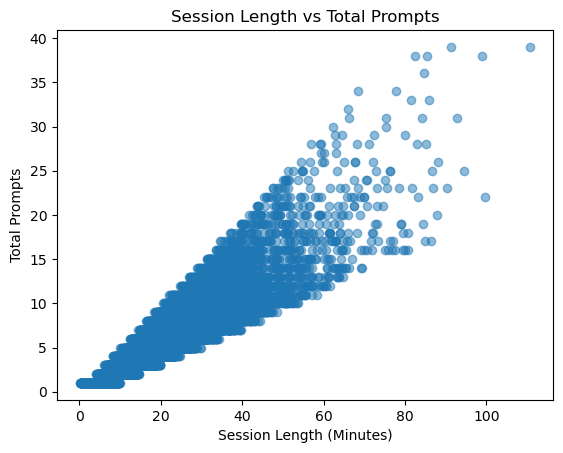

In [15]:
# scatterplot of SessionLengthMin versis TotalPrompts
plt.scatter(df['SessionLengthMin'], df['TotalPrompts'], alpha=0.5)
plt.title('Session Length vs Total Prompts')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Total Prompts')
plt.show()


In [16]:
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


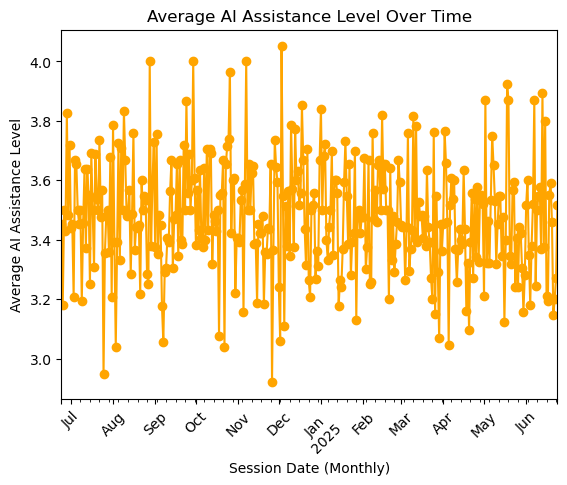

In [17]:
# line chart of average AI_AssistanceLevel over time (SessionDate).
df['SessionDate']=pd.to_datetime(df['SessionDate'])
avg_assistance = df.groupby("SessionDate")["AI_AssistanceLevel"].mean()
avg_assistance.plot(kind='line', marker='o', color='orange')
plt.title('Average AI Assistance Level Over Time')
plt.xlabel('Session Date (Monthly)')
plt.ylabel('Average AI Assistance Level')
plt.xticks(rotation=45)
plt.show()



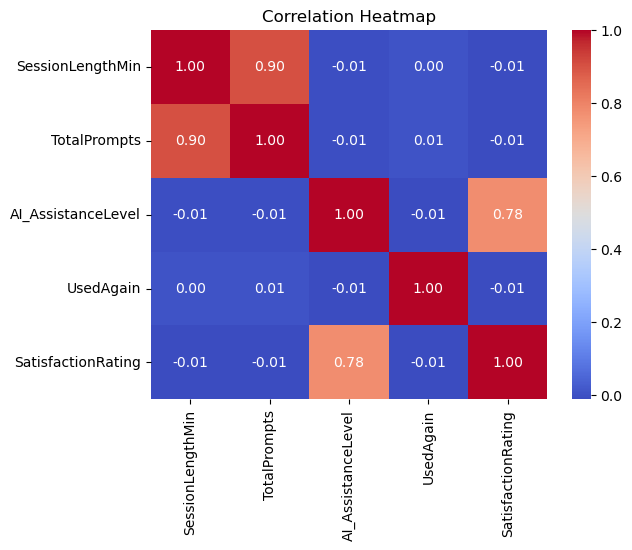

In [18]:
# heatmap of correlations on numeric features
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [19]:
# average SessionLengthMin for each TaskType
avg_session_by_task=df.groupby('TaskType')['SessionLengthMin'].mean().sort_values(ascending=False)
print(avg_session_by_task)

TaskType
Brainstorming    21.964223
Research         20.410000
Homework Help    19.940536
Studying         19.705917
Writing          19.705888
Coding           19.467659
Name: SessionLengthMin, dtype: float64


In [20]:
# Discipline with the most sessions
most_sessions_discipline=df['Discipline'].value_counts().idxmax()
print("Discipline with the most sessions:", most_sessions_discipline)

Discipline with the most sessions: Biology


In [21]:
# average AI_AssistanceLevel across StudentLevel
avg_assistance_by_level=df.groupby('StudentLevel')['AI_AssistanceLevel'].mean()
print(avg_assistance_by_level)


StudentLevel
Graduate         3.469674
High School      3.477060
Undergraduate    3.483607
Name: AI_AssistanceLevel, dtype: float64


In [22]:
# most common FinalOutcome for Graduate students
most_common_outcome_graduate=df[df['StudentLevel']=='Graduate']['FinalOutcome'].mode()[0]
print("Most common FinalOutcome for Graduate students:", most_common_outcome_graduate)

Most common FinalOutcome for Graduate students: Assignment Completed


In [23]:
# median SessionLengthMin for each FinalOutcome.
median_session_by_outcome=df.groupby('FinalOutcome')['SessionLengthMin'].median()
print(median_session_by_outcome)

FinalOutcome
Assignment Completed    16.570
Confused                16.040
Gave Up                 17.290
Idea Drafted            17.085
Name: SessionLengthMin, dtype: float64


#### Feature Engineering & Encoding

In [24]:
# Convert SessionDate into Year, Month, and Day columns
df['Year']=df['SessionDate'].dt.year
df['Month']=df['SessionDate'].dt.month
df['Day']=df['SessionDate'].dt.day
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18


In [25]:
# Encode StudentLevel using Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['StudentLevelEncoded']=le.fit_transform(df['StudentLevel'])
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevelEncoded
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,2024,11,3,2
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,2024,8,25,2
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,2025,1,12,2
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,2025,5,6,2
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,2025,3,18,2


In [26]:
# One-Hot Encoding to TaskType
df=pd.get_dummies(df, columns=['TaskType'], drop_first=True)
df.head()


,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevelEncoded,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,True,False
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,True,False
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,True,False,False,False,False
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,True,False,False,False,False
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,True


In [27]:
# Create a new feature: PromptsPerMinute = TotalPrompts / SessionLengthMin
df['PromptsPerMinute']=df['TotalPrompts']/df['SessionLengthMin']
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Year,Month,Day,StudentLevelEncoded,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,PromptsPerMinute
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,2024,11,3,2,False,False,False,True,False,0.352564
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,2024,8,25,2,False,False,False,True,False,0.458365
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,2025,1,12,2,True,False,False,False,False,0.260146
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,2025,5,6,2,True,False,False,False,False,0.270270
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,2025,3,18,2,False,False,False,False,True,0.320057


In [28]:
# Bin SessionLengthMin into categories: Short, Medium, Long
bins=[0, 15, 30, np.inf]
labels=['Short', 'Medium', 'Long']
df['SessionLengthCategory']=pd.cut(df['SessionLengthMin'], bins=bins, labels=labels)
df.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,...,Month,Day,StudentLevelEncoded,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing,PromptsPerMinute,SessionLengthCategory
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,2,Assignment Completed,True,1.0,...,11,3,2,False,False,False,True,False,0.352564,Long
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,3,Assignment Completed,True,2.0,...,8,25,2,False,False,False,True,False,0.458365,Short
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,3,Assignment Completed,True,3.3,...,1,12,2,True,False,False,False,False,0.260146,Medium
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,3,Assignment Completed,True,3.5,...,5,6,2,True,False,False,False,False,0.270270,Short
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,3,Assignment Completed,True,2.9,...,3,18,2,False,False,False,False,True,0.320057,Medium


In [29]:
# Predict FinalOutcome using a Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Prepare the data
features=['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute'] + [col for col in df.columns if col.startswith('TaskType_')] 





In [30]:
# splitting the data
x=df[features]
y=df['FinalOutcome']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
# Train the model
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Evaluate the model
accuracy=model.score(x_test, y_test)
print("Model Accuracy:", accuracy)



Model Accuracy: 0.357


In [33]:
# prediction
predictions=model.predict(x_test)
print(predictions)


['Assignment Completed' 'Idea Drafted' 'Idea Drafted' ...
 'Assignment Completed' 'Idea Drafted' 'Confused']


In [34]:
# Predict UsedAgain using Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# splitting  the data
x=df[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute']]
y=df['UsedAgain']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)




In [35]:
# fitting the model
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [36]:
# Evaluate the model
accuracy=model.score(x_test, y_test)
print("Logistic Regression Model Accuracy:", accuracy)

Logistic Regression Model Accuracy: 0.6925


In [37]:
# Predictions
predictions=model.predict(x_test)
print(predictions)


[ True  True  True ...  True  True  True]


In [38]:
# Train a Random Forest Classifier to predict FinalOutcome
from sklearn.ensemble import RandomForestClassifier
# Prepare the data and split it into training and testing sets
features=['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute'] + [col for col in df.columns if col.startswith('TaskType_')]
x=df[features]
y=df['FinalOutcome']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)



In [39]:
#fitting the model
model=RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluate the model
accuracy=model.score(x_test, y_test)
print("Random Forest Model Accuracy:", accuracy)


Random Forest Model Accuracy: 0.385


In [40]:
# predictions
predictions=model.predict(x_test)
print(predictions)

['Assignment Completed' 'Idea Drafted' 'Idea Drafted' ...
 'Assignment Completed' 'Idea Drafted' 'Assignment Completed']


In [41]:
# KNN (K-Nearest Neighbors) to classify UsedAgain
from sklearn.neighbors import KNeighborsClassifier
# splitting the data
x=df[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute']]
y=df['UsedAgain']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)


In [42]:
# Train the model
model=KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)



KNeighborsClassifier()

In [43]:
# Evaluate the model
accuracy=model.score(x_test, y_test)
print("KNN Model Accuracy:", accuracy)

KNN Model Accuracy: 0.633


In [44]:
# Predictions
predictions=model.predict(x_test)
print(predictions)


[ True  True  True ...  True  True  True]


In [45]:
# Train a Naive Bayes Classifier to predict FinalOutcome
from sklearn.naive_bayes import GaussianNB
# Prepare the data and split it into training and testing sets
features=['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute'] + [col for col in df.columns if col.startswith('TaskType_')]
x=df[features]
y=df['FinalOutcome']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)




In [46]:
# Train the model
model=GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [47]:
# Evaluate the model
accuracy=model.score(x_test, y_test)
print("Naive Bayes Model Accuracy:", accuracy)


Naive Bayes Model Accuracy: 0.456


In [48]:
# Predictions
predictions=model.predict(x_test)
print(predictions)

['Assignment Completed' 'Assignment Completed' 'Assignment Completed' ...
 'Assignment Completed' 'Assignment Completed' 'Gave Up']


In [49]:
# Build a Gradient Boosting Classifier for UsedAgain
from sklearn.ensemble import GradientBoostingClassifier
# splitting the data
x=df[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute']]
y=df['UsedAgain']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=42)


In [50]:
# Train the model
model=GradientBoostingClassifier(random_state=42)
model.fit(x_train, y_train)



GradientBoostingClassifier(random_state=42)

In [51]:
# Evaluate the model
accuracy=model.score(x_test, y_test)
print("Gradient Boosting Model Accuracy:", accuracy)


Gradient Boosting Model Accuracy: 0.692


In [52]:
# Predictions
predictions=model.predict(x_test)
print(predictions)

[ True  True  True ...  True  True  True]


In [53]:
!pip install xgboost


In [54]:
# XGBoost Classifier to predict FinalOutcome
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




In [55]:
# Encode target labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [56]:


# Prepare data and split into training and testing sets
features=['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute'] + [col for col in df.columns if col.startswith('TaskType_')]
x=df[features]
y=df['FinalOutcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [57]:

# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=200,learning_rate=0.1,max_depth=5,random_state=42,use_label_encoder=False,eval_metric="logloss")
# Train the model
xgb_clf.fit(x_train, y_train_enc)
#predictions
y_pred_enc = xgb_clf.predict(x_test)

# Convert predictions back to original labels
y_pred = le.inverse_transform(y_pred_enc)
print(y_pred) 


c:\Users\USER\Anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:06:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[ True  True  True ...  True  True  True]


In [58]:
#split the dataset into 80% training and 20% testing sets
from sklearn.model_selection import train_test_split
features=['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute'] + [col for col in df.columns if col.startswith('TaskType_')]
x=df[features]
y=df['FinalOutcome']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size= 0.2,train_size=0.8, random_state=42)









In [59]:
# Evaluate one model using accuracy and a confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
# splitting the data
features=['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute'] + [col for col in df.columns if col.startswith('TaskType_')]
x=df[features]
y=df['FinalOutcome']




In [60]:
#fitting the model
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)





DecisionTreeClassifier(random_state=42)

In [61]:
# predictions
predictions=model.predict(x_test)
print(predictions)





['Assignment Completed' 'Idea Drafted' 'Idea Drafted' ...
 'Assignment Completed' 'Idea Drafted' 'Confused']


In [62]:
# calculate accuracy
accuracy=accuracy_score(y_test, predictions)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.357


In [63]:
# confusion matrix
conf_matrix=confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[459 147  76 248]
 [154  58  27 110]
 [ 71  37  17  45]
 [246  80  45 180]]


In [64]:
# Generate a classification report (precision, recall, f1-score)
from sklearn.metrics import classification_report
report=classification_report(y_test,predictions)
print(report)


                      precision    recall  f1-score   support

Assignment Completed       0.49      0.49      0.49       930
            Confused       0.18      0.17      0.17       349
             Gave Up       0.10      0.10      0.10       170
        Idea Drafted       0.31      0.33      0.32       551

            accuracy                           0.36      2000
           macro avg       0.27      0.27      0.27      2000
        weighted avg       0.35      0.36      0.36      2000



In [65]:
# Perform cross-validation for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC


In [66]:
# splitting the data
features=['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute'] + [col for col in df.columns if col.startswith('TaskType_')]
x=df[features]
y=df['FinalOutcome']
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,train_size=0.8, random_state=42)



In [67]:
# Train the model
model=LogisticRegression()
model.fit(x_train, y_train)

#predictions
y_pred=model.predict(x_test)
print(y_pred)



['Assignment Completed' 'Assignment Completed' 'Assignment Completed' ...
 'Assignment Completed' 'Assignment Completed' 'Idea Drafted']


c:\Users\USER\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Creating SVM classifier
svm_classifier = SVC(kernel='linear')
# Performing 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(svm_classifier, x, y, cv=kf, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))


In [ ]:
# Use GridSearchCV to tune hyperparameters of a Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#base model
model=DecisionTreeClassifier(random_state=42)
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,train_size=0.8, random_state=42)



In [ ]:
# Define hyperparameters and their values to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)



In [ ]:
# Evaluate best model
best_accuracy = best_model.score(x_test, y_test)
print("Best Model Accuracy:", best_accuracy)

In [ ]:
#Tune a Random Forest Classifier (n_estimators, max_depth)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define base model
rf = RandomForestClassifier(random_state=42)

#Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # number of trees
    'max_depth': [None, 10, 20, 30]   # depth of trees
}



In [ ]:
#GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',  # could also try 'f1', 'recall', etc.
    cv=5,                # 5-fold cross validation
    n_jobs=-1,
    verbose=1
)



In [ ]:
# Fit to training data
grid_search.fit(x_train, y_train)








In [ ]:
# Best hyperparameters
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

In [ ]:
# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# Compare Logistic Regression, Decision Tree, Random Forest, Naive Bayes, KNN, Gradient Boosting, and XGBoost for predicting UsedAgain
# Prepare the data
x=df[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'StudentLevelEncoded', 'PromptsPerMinute']]
y=df['UsedAgain']

x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2,train_size=0.8, random_state=42)



In [ ]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric="logloss")
}


In [ ]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))


In [ ]:
# predictions
y_pred=model.predict(x_test)
print(y_pred)
# Display results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df)
